<a href="https://colab.research.google.com/github/pralineso/estudos_ds/blob/main/Analise_expoloratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Esse notebook apresenta uma Análise exploratória dos dados da [pesquisa](https://www.kaggle.com/datahackers/pesquisa-data-hackers-2019) de mercado de Data Science feita pelo Data Hackers.
Tendo em vista a crescente procura por profissionais desta área, entender o perfil dos profissionais, bem como quais as ferramentas mais utilizadas por aqueles que estão no mercado de trabalho, é interessante para todos que desejam atuar na área de dados.


Obs.: Base de dados apresentada e sugerida durante o curso da [FLAI](https://www.flai.com.br/). 

## Objetivo

 -  Entender o perfil dos profissionais da área de dados no Brasil e praticar analise exploratória dos dados.

 -  Foram elaboradas 9 perguntas para atingir o objetivo traçado. 

    1.   Qual a faixa etária dos profissionais de dados ?
    2.   Relação dos profissionais por estados brasileiros (onde habitam?)
    3.   Qual a relação entre o nivel de ensino, area de formação e faixa salarial?
    4.   Dos entrevistados que possuem maior experiencia na area de dados, quantos sao gestores? eles tem o maior salário?
    5.  Qual a relação entre o tempo de experiencia na area de TI com a experiencia na area de dados?
    6.  Qual a demanda do mercado para profissionais de dados? Qual setor tem mais profissionais atuando como Cientista de Dados ?
    7.  Quais as linguagens de programaçao, fontes de dados, metodos, opçoes de cloud, base de dados, ferramentas de BI e tecnologia de ETL mais utilizadas ?
    8.  Quais as plataformas de estudo mais utilizadas e mais preferidas pelos entrevistados?
    9. Como esses profissionais se atualizam? Quais as as formas/meios utilizados para se atualizar o seu conhecimento ?


# Conjuntos de dados

### Importação

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
arquivo = 'https://raw.githubusercontent.com/ricardorocha86/Datasets/master/PesquisaDH/datahackers-survey-2019-anonymous-responses.csv'
dados = pd.read_csv(arquivo)

#Exporando a base

In [ ]:
#Linhas e colunas da base
dados.shape

(1765, 170)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Columns: 170 entries, ('P0', 'id') to ('D6', 'anonymized_role')
dtypes: float64(5), int64(146), object(19)
memory usage: 2.3+ MB


In [ ]:
dados.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P30', 'microsoft_azure')","('P30', 'do_not_know')","('P30', 'other')","('P31', 'data_hackers_blog')","('P31', 'data_hackers_podcast')","('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')"
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,

In [ ]:
#proporção faltante
#da menos faltante pra mais faltante
(dados.isnull().sum()[dados.isnull().sum() != 0]/dados.shape[0]).sort_values()

('P2', 'gender')                                 0.001700
('P36', 'draw_participation')                    0.002266
('P1', 'age')                                    0.013598
('P6', 'born_or_graduated')                      0.019263
('D3', 'anonymized_degree_area')                 0.019830
('P35', 'data_science_plataforms_preference')    0.079320
('P12', 'workers_number')                        0.134844
('P13', 'manager')                               0.134844
('P16', 'salary_range')                          0.134844
('D4', 'anonymized_market_sector')               0.137677
('P5', 'living_state')                           0.190935
('D1', 'living_macroregion')                     0.190935
('D6', 'anonymized_role')                        0.291218
('P22', 'most_used_proggraming_languages')       0.486686
('P29', 'have_data_warehouse')                   0.550708
('D2', 'origin_macroregion')                     0.815864
('D5', 'anonymized_manager_level')               0.827195
('P35', 'other

### Pergunta 1: Qual a faixa etária dos profissionais de dados ?

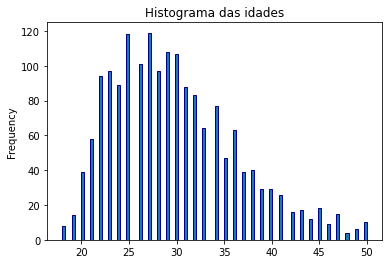

In [ ]:
dados['(\'P1\', \'age\')'].plot(kind='hist', bins = 100, edgecolor ='darkblue')
plt.title('Histograma das idades')
plt.show()

A média da idade é de 29 anos

In [ ]:
#Cortando as idades para mlehor visualização
cortes = [0, 18, 24, 30, 36, 42, 50, 100]
nomes = ['[0,18]', '[19,24]', '[25,30]', '[31,36]', '[37,42]', '[43,50]', '[51,100]']

dados['idadeT2'] = pd.cut(dados["('P1', 'age')"], bins = cortes, labels = nomes)

In [ ]:
dados['idadeT2'].value_counts().sort_index()

[0,18]        8
[19,24]     391
[25,30]     650
[31,36]     422
[37,42]     179
[43,50]      91
[51,100]      0
Name: idadeT2, dtype: int64

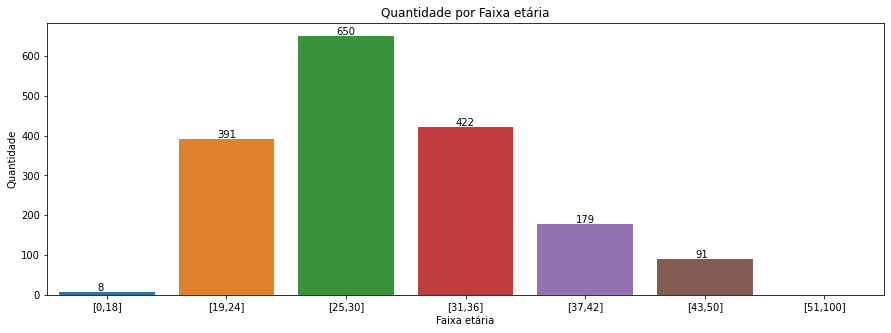

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.countplot(data=dados, x='idadeT2', palette="tab10")
plt.title('Quantidade por Faixa etária')
plt.ylabel('Quantidade')
plt.xlabel('Faixa etária')

total = len(dados['idadeT2'])
for p in ax.patches:
        qtd_values = '{:.0f}'.format(p.get_height())
        x = p.get_x() + p.get_width() / 2.5
        y = p.get_y() + p.get_height() + 3
        ax.annotate(qtd_values, (x, y))

plt.show()


Nota-se que ninguem acima de 51 anos respondeu a pesquisa

###Pergunta 2: Relação dos profissionais por estados brasileiros (onde habitam?)

In [ ]:
#para um outro momento: https://medium.com/data-hackers/criando-mapas-interativos-e-choropleth-maps-com-folium-em-python-abffae63bbd6

In [ ]:
dados.shape[0]

1765

In [ ]:
dados["('P5', 'living_state')"].isna().sum

<bound method Series.sum of 0       False
1       False
2       False
3       False
4        True
        ...  
1760    False
1761    False
1762    False
1763    False
1764     True
Name: ('P5', 'living_state'), Length: 1765, dtype: bool>

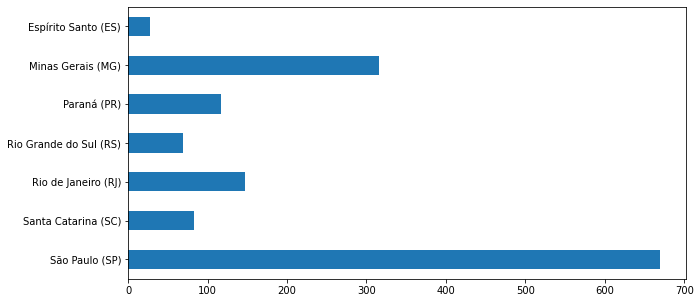

In [ ]:
plt.figure(figsize=(10,5))
dados["('P5', 'living_state')"].value_counts().sort_index(ascending=False).plot(kind='barh')

plt.show()

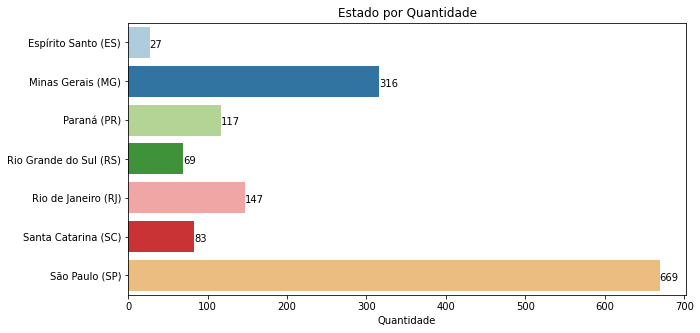

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y=dados["('P5', 'living_state')"].sort_values(ascending=True), data = dados, palette='Paired')
plt.title('Estado por Quantidade')
plt.xlabel('Quantidade')
plt.ylabel('')

total = len(dados["('P5', 'living_state')"])
for p in ax.patches:
  qtd = '{:.0f}'.format(p.get_width())
  #setando posições no grafico
  x = p.get_x() + p.get_width() 
  y = p.get_y() + p.get_height() / 1.5
  ax.annotate(qtd, (x,y))


plt.show()

Nota-se que dentre os dados que foram preenchidos a maior parte dos profissionais residem em SP, seguidos de MG e RJ.

Como essa pergunta foi mascarada, poucos estados podem estar aparecendo na listagem. De 1765 entrevistados apenas 1428 estão preenchidos.

### Alguns tratamentos

#### *Ordenando a faixa salarial*

In [ ]:
#"clonando a coluna"
dados["salario2"] = dados["('P16', 'salary_range')"]


In [ ]:
#alterando o tipo da coluna
dados["salario2"] = dados["salario2"] .astype('category')

In [ ]:
#listando as caregorias
dados.salario2.cat.categories

Index(['Acima de R$ 25.001/mês', 'Menos de R$ 1.000/mês',
       'de R$ 1.001/mês a R$ 2.000/mês', 'de R$ 12.001/mês a R$ 16.000/mês',
       'de R$ 16.001/mês a R$ 20.000/mês', 'de R$ 2.001/mês a R$ 3000/mês',
       'de R$ 20.001/mês a R$ 25.000/mês', 'de R$ 3.001/mês a R$ 4.000/mês',
       'de R$ 4.001/mês a R$ 6.000/mês', 'de R$ 6.001/mês a R$ 8.000/mês',
       'de R$ 8.001/mês a R$ 12.000/mês'],
      dtype='object')

In [ ]:
#reordenando as cetogorias
dados.salario2 = dados.salario2.cat.reorder_categories(['Menos de R$ 1.000/mês',
                                                        'de R$ 1.001/mês a R$ 2.000/mês',
                                                        'de R$ 2.001/mês a R$ 3000/mês',
                                                        'de R$ 3.001/mês a R$ 4.000/mês',
                                                        'de R$ 4.001/mês a R$ 6.000/mês',
                                                        'de R$ 6.001/mês a R$ 8.000/mês',
                                                        'de R$ 8.001/mês a R$ 12.000/mês',
                                                        'de R$ 12.001/mês a R$ 16.000/mês',
                                                        'de R$ 16.001/mês a R$ 20.000/mês',
                                                        'de R$ 20.001/mês a R$ 25.000/mês',
                                                        'Acima de R$ 25.001/mês', ], ordered=True)

#### *Alterando o texto da coluna do tempo de experiencia*

In [ ]:
#alterando texto de "Não tive expericnecia na áre de TI/Engenharia de Software antes de começar a trabalhar na área de dados" para "Não tive experiencia na area de TI"

novo_texto = { 'Não tive experiência na área de TI/Engenharia de Software antes de começar a trabalhar na área de dados' : 'Não tive experiencia na area de TI anteriormente',
              'Menos de 1 ano' : 'Menos de 1 ano',
              'de 1 a 2 anos' : 'de 1 a 2 anos ',
              'de 2 a 3 anos' : 'de 2 a 3 anos',
              'de 4 a 5 anos' : 'de 4 a 5 anos',
              'de 6 a 10 anos' : 'de 6 a 10 anos',
              'Mais de 10 anos' : 'Mais de 10 anos  '}


dados['tempo_experiencia_anterior'] = dados["(\'P18\', \'time_experience_before\')"].map(novo_texto)

####*Ordenando a tempo de experiencia ds*

In [ ]:
#precisa ordenar o tempo de experiencia tbm
dados["tempo_experiencia_ds"] = dados["('P17', 'time_experience_data_science')"]

In [ ]:
#alterando o tipo da coluna
dados["tempo_experiencia_ds"] = dados["tempo_experiencia_ds"] .astype('category')

In [ ]:
#listando as caregorias
dados.tempo_experiencia_ds.cat.categories

Index(['Mais de 10 anos', 'Menos de 1 ano',
       'Não tenho experiência na área de dados', 'de 1 a 2 anos',
       'de 2 a 3 anos', 'de 4 a 5 anos', 'de 6 a 10 anos'],
      dtype='object')

In [ ]:
#reordenando as cetogorias
dados.tempo_experiencia_ds = dados.tempo_experiencia_ds.cat.reorder_categories(['Não tenho experiência na área de dados',
                                                                                'Menos de 1 ano',   
                                                                                'de 1 a 2 anos',
                                                                                'de 2 a 3 anos',
                                                                                'de 4 a 5 anos',
                                                                                'de 6 a 10 anos',
                                                                                'Mais de 10 anos',
                                                                                ], ordered=True)

#### *Agrupando as profissoes*

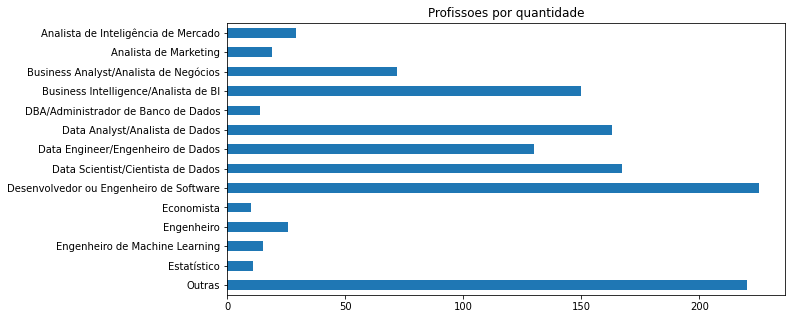

In [ ]:
#profissoes de quem respondeu a pesquisa
plt.figure(figsize=(10,5))
dados['(\'D6\', \'anonymized_role\')'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Profissoes por quantidade')
plt.show()

In [ ]:
#agrupando as profissoes
profmap = {'Desenvolvedor ou Engenheiro de Software': 'Desenvolvedor/Engenheiro de Software', 
                                            'Outras': 'Outras',
                 'Data Scientist/Cientista de Dados': 'Cientista de Dados',
                    'Data Analyst/Analista de Dados': 'Analista de Dados',
              'Business Intelligence/Analista de BI': 'Analista de BI',
                 'Data Engineer/Engenheiro de Dados': 'Engenheiro de Dados',
             'Business Analyst/Analista de Negócios': 'Analista de BI',
               'Analista de Inteligência de Mercado': 'Analista de BI',
                                        'Engenheiro': 'Outras',
                             'Analista de Marketing': 'Outras',
                    'Engenheiro de Machine Learning': 'Cientista de Dados',
               'DBA/Administrador de Banco de Dados': 'Engenheiro de Dados',
                                       'Estatístico': 'Cientista de Dados',
                                        'Economista': 'Outras'}

dados['profissao'] = dados["('D6', 'anonymized_role')"].map(profmap)

In [ ]:
#separando as bases
lista = ['Cientista de Dados', 'Analista de Dados', 'Analista de BI', 'Engenheiro de Dados']
pds = dados[dados['profissao'].isin(lista)]
cds = dados[dados['profissao'] == 'Cientista de Dados'] 
ads = dados[dados['profissao'] == 'Analista de Dados'] 
abi = dados[dados['profissao'] == 'Analista de BI'] 
eds = dados[dados['profissao'] == 'Engenheiro de Dados']


#OBS.: Essa foi uma forma de analisar os dados apresentada durante a aula.

Dessa forma o grafico ficou com menos profissoes

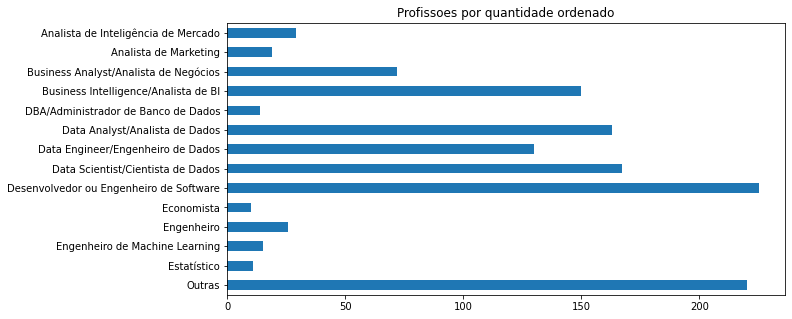

In [ ]:
#Agora usando a base com as profissoes agrupadas
plt.figure(figsize=(10,5))
dados['(\'D6\', \'anonymized_role\')'].value_counts().sort_index(ascending=False).plot(kind='barh')
plt.title('Profissoes por quantidade ordenado')
plt.show()

#### Funções

In [ ]:
#Funcao para limpar a string, utiliza para tratar os dados
#Recebe um vetor 
def limpaStr(vet):

  vet_limpo = []

  for i in vet:

    palavra = i[9: -2]
    #nesse caso estou usando sempre 9 porque todas essas variaveis tem sempre 9 caracteres antes da palavra limpa
    #ex.: i = "('P21', 'python')"
    # ('P21', ' == ('P22', ' == ('P23', ' == .... ==  9 caractes
    # ')        ==  2 caractes

    #print(palavra)

    vet_limpo.append(palavra)
  
  return vet_limpo

In [ ]:
def insereDadoAte(vet, n):
  tamanho_vet = len(vet)
  cont = 0

  while cont < n:
    if cont >= tamanho_vet:
      vet.append('---')
    
    cont = cont + 1

  return vet


### Pergunta 3: Qual a relação entre o nivel de ensino com a area de formação e faixa salarial?

Para essa pergunta vou utilizar a base separada por profissoes e aprofundar apenas nos profissionais que se consideraram Cientista de Dados

In [ ]:
#para um ooutro momento:
  #arrumar os eixos
  #alterar o titulo da legenda

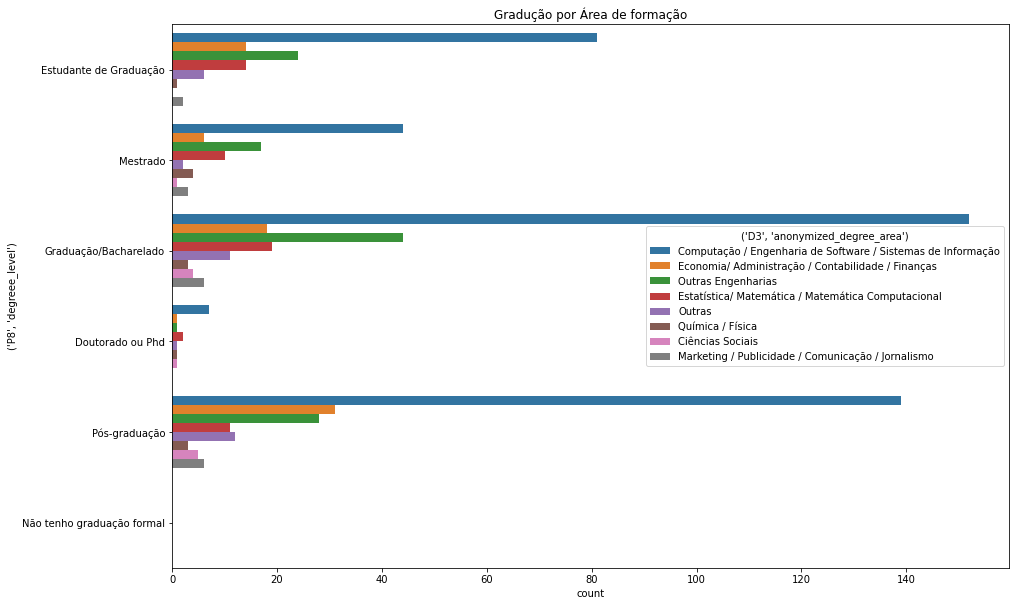

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y=pds["('P8', 'degreee_level')"], data = pds, hue=pds["('D3', 'anonymized_degree_area')"], palette='tab10')
plt.title('Gradução por Área de formação')
plt.show()

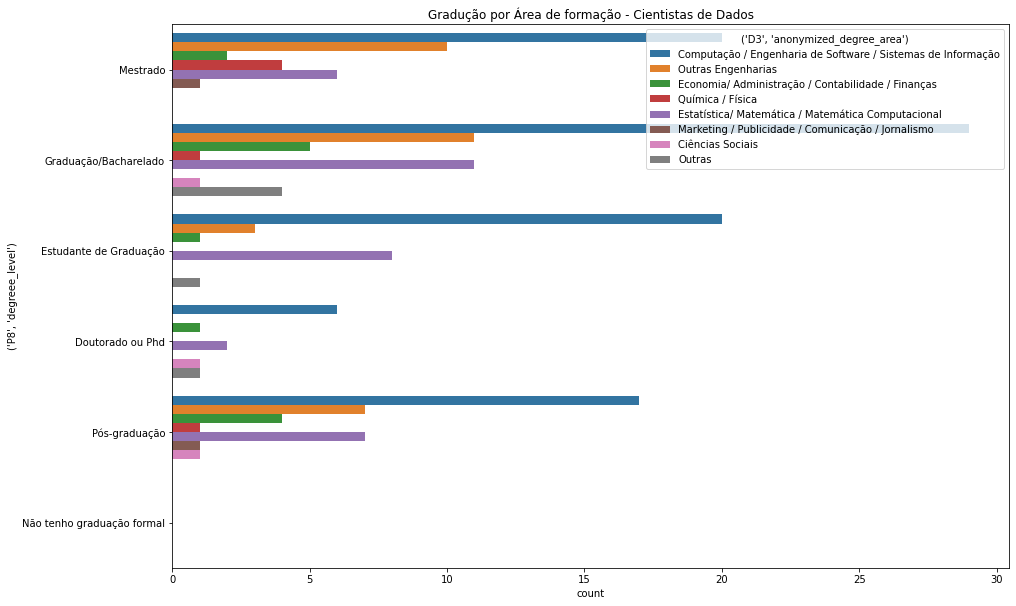

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y=cds["('P8', 'degreee_level')"], data = cds, hue=cds["('D3', 'anonymized_degree_area')"], palette='tab10')
plt.title('Gradução por Área de formação - Cientistas de Dados')
plt.show()

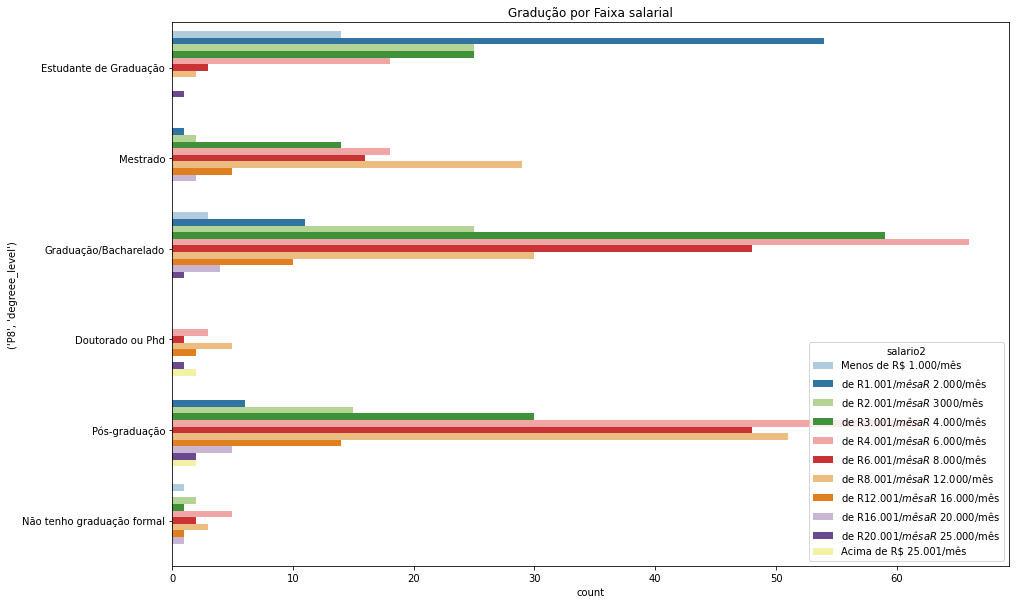

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y=pds["('P8', 'degreee_level')"].sort_index(), data = pds, hue=pds["salario2"], palette='Paired')
plt.title('Gradução por Faixa salarial')
plt.show()

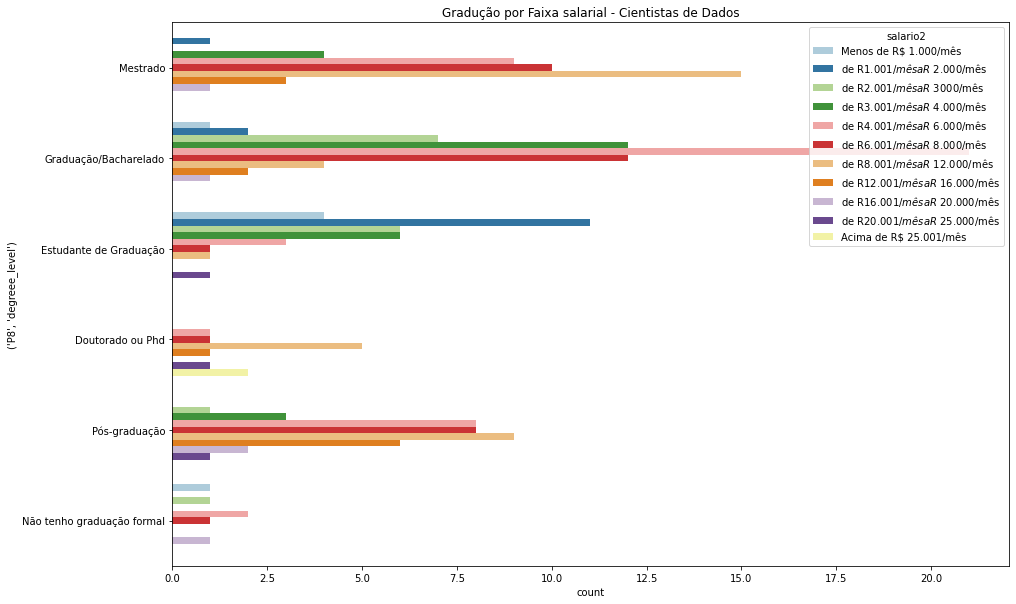

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(y=cds["('P8', 'degreee_level')"], data = cds, hue=cds["salario2"], palette='Paired')
plt.title('Gradução por Faixa salarial - Cientistas de Dados')
plt.show()

Um grupo legal de aprofundar são os estudantes de gradução para ver quais os cursos desses profssionais. Observando esse grafico é possivel observar que pessoas que nao tem uma gradução formal podem ser cientistas de dados. Outra coisa legal de observar é que as pessoas que tem os maiores salários acima de 25 mil como cientistas de dados possuem, Doutorado ou PHD.

### Pergunta 4: Dos entrevistados que possuem maior experiencia na area de dados, quantos sao gestores? eles tem o maior salário?

In [ ]:
pds["('P13', 'manager')"].value_counts()

0.0    734
1.0     17
Name: ('P13', 'manager'), dtype: int64

Apenas 17 profissionais responderam atuar como gestores.

Considerando que "maior experiencia" seja maior que 'de 4 a 5 anos' em data science. Observamos que 8 profissionais se encaixam nessa descrição.

In [ ]:
pds[[ "tempo_experiencia_ds", "profissao", "salario2"]][(pds["('P13', 'manager')"]==1) & (pds["salario2"]>='de R$ 8.001/mês a R$ 12.000/mês') &  (pds["tempo_experiencia_ds"]>='de 4 a 5 anos')]

,tempo_experiencia_ds,profissao,salario2
1643,de 6 a 10 anos,Analista de Dados,de R$ 8.001/mês a R$ 12.000/mês
1651,Mais de 10 anos,Analista de BI,de R$ 12.001/mês a R$ 16.000/mês
1668,de 6 a 10 anos,Analista de BI,de R$ 8.001/mês a R$ 12.000/mês
1681,Mais de 10 anos,Analista de Dados,de R$ 8.001/mês a R$ 12.000/mês
1683,de 4 a 5 anos,Analista de Dados,de R$ 12.001/mês a R$ 16.000/mês
1750,Mais de 10 anos,Engenheiro de Dados,de R$ 16.001/mês a R$ 20.000/mês
1752,de 4 a 5 anos,Analista de BI,de R$ 8.001/mês a R$ 12.000/mês
1763,de 4 a 5 anos,Engenheiro de Dados,de R$ 8.001/mês a R$ 12.000/mês


Considerando que "maior salario" sejam os acima de 8 mil. Observamos que 10 profissionais se encaixam nessa descrição.

In [ ]:
pds[[ "tempo_experiencia_ds", "profissao", "salario2"]][(pds["('P13', 'manager')"]==1) & (pds["salario2"]>='de R$ 8.001/mês a R$ 12.000/mês') ]

,tempo_experiencia_ds,profissao,salario2
1643,de 6 a 10 anos,Analista de Dados,de R$ 8.001/mês a R$ 12.000/mês
1651,Mais de 10 anos,Analista de BI,de R$ 12.001/mês a R$ 16.000/mês
1656,de 2 a 3 anos,Engenheiro de Dados,de R$ 12.001/mês a R$ 16.000/mês
1668,de 6 a 10 anos,Analista de BI,de R$ 8.001/mês a R$ 12.000/mês
1681,Mais de 10 anos,Analista de Dados,de R$ 8.001/mês a R$ 12.000/mês
1683,de 4 a 5 anos,Analista de Dados,de R$ 12.001/mês a R$ 16.000/mês
1705,de 2 a 3 anos,Analista de BI,de R$ 12.001/mês a R$ 16.000/mês
1750,Mais de 10 anos,Engenheiro de Dados,de R$ 16.001/mês a R$ 20.000/mês
1752,de 4 a 5 anos,Analista de BI,de R$ 8.001/mês a R$ 12.000/mês
1763,de 4 a 5 anos,Engenheiro de Dados,de R$ 8.001/mês a R$ 12.000/mês


Qual a profissao dos que ganham 'Acima de R$ 25.001/mês' ?

In [ ]:
dados[["('P18', 'time_experience_before')", "('P17', 'time_experience_data_science')", "profissao", "salario2"]][(dados["salario2"]=="Acima de R$ 25.001/mês") ]

,"('P18', 'time_experience_before')","('P17', 'time_experience_data_science')",profissao,salario2
175,Mais de 10 anos,Mais de 10 anos,NaN,Acima de R$ 25.001/mês
216,Menos de 1 ano,de 6 a 10 anos,NaN,Acima de R$ 25.001/mês
351,Mais de 10 anos,de 6 a 10 anos,NaN,Acima de R$ 25.001/mês
425,de 2 a 3 anos,de 6 a 10 anos,Cientista de Dados,Acima de R$ 25.001/mês
437,Menos de 1 ano,de 4 a 5 anos,Cientista de Dados,Acima de R$ 25.001/mês
705,de 6 a 10 anos,de 6 a 10 anos,Outras,Acima de R$ 25.001/mês
877,de 2 a 3 anos,de 4 a 5 anos,Outras,Acima de R$ 25.001/mês
887,Mais de 10 anos,de 6 a 10 anos,NaN,Acima de R$ 25.001/mês
894,de 2 a 3 anos,Mais de 10 anos,Engenheiro de Dados,Acima de R$ 25.001/mês
1112,Não tive experiência na área de TI/Engenharia ...,de 4 a 5 anos,NaN,Acima de R$ 25.001/mês


Profissionasi que atuam como Cientista de dados, Engenheiro de Dadose e quem tem tempo de expeciencia acima de 4 anos, recebem acima de 25 mil.

###Pergunta 5: Qual a relação entre o tempo de experiencia na area de TI com a experiencia na area de dados?

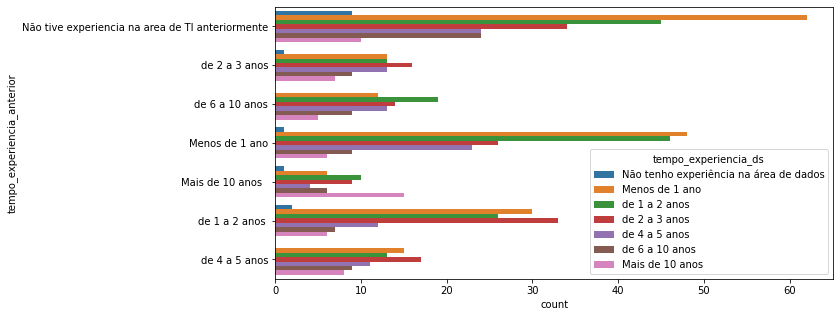

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y=pds['tempo_experiencia_anterior'].sort_index(), data=pds, hue='tempo_experiencia_ds')

plt.show()

In [ ]:
#para essa visualização é melhor agrupar menos de 1 ano com nao tive experiencia na area de TI e os demais como acima de dois anos

In [ ]:
#plotar mais um grafico com a soma total

### Pergunta 6: Qual a demanda do mercado para profissionais de dados? Qual setor tem mais profissionais atuando como Cientista de Dados ?

In [ ]:
pds.shape

(751, 175)

In [ ]:
pds["('D4', 'anonymized_market_sector')"].value_counts().sum()

#existem algumas linhas vazias nessa coluna de setores

748

In [ ]:
#lista setores sem nan
pds["('D4', 'anonymized_market_sector')"].value_counts()

Tecnologia/Fábrica de Software    240
Finanças ou Bancos                117
Outras                             83
Varejo                             42
Internet/Ecommerce                 40
Marketing                          34
Setor Público                      33
Indústria (Manufatura)             30
Área da Saúde                      29
Educação                           29
Telecomunicação                    21
Agronegócios                       13
Setor Automotivo                    9
Setor Alimentício                   9
Entretenimento ou Esportes          8
Seguros ou Previdência              7
Setor Farmaceutico                  4
Name: ('D4', 'anonymized_market_sector'), dtype: int64

Quais setores são dos profissionais que  consideram  atuar com data science (P19) ?

In [ ]:
list(pds["('D4', 'anonymized_market_sector')"][(pds["('P19', 'is_data_science_professional')"] == 1)].unique())

['Educação',
 'Tecnologia/Fábrica de Software',
 'Área da Saúde',
 'Varejo',
 'Outras',
 'Seguros ou Previdência',
 'Finanças ou Bancos',
 'Marketing',
 'Indústria (Manufatura)',
 'Setor Farmaceutico',
 'Setor Público',
 'Entretenimento ou Esportes',
 'Internet/Ecommerce',
 'Telecomunicação',
 'Setor Alimentício',
 nan,
 'Agronegócios',
 'Setor Automotivo']

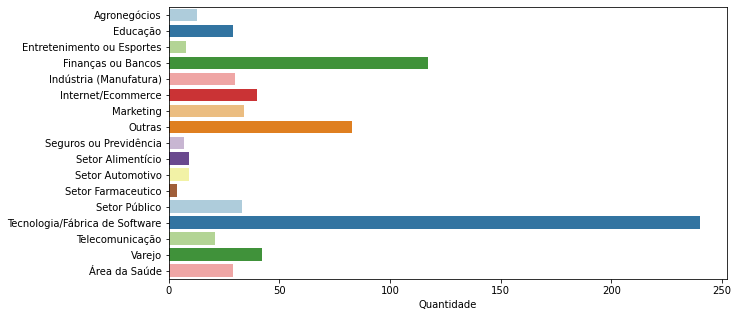

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(y=pds["('D4', 'anonymized_market_sector')"].sort_values(ascending=True), data = pds, palette='Paired')
#plt.title('Estado por Quantidade')
plt.xlabel('Quantidade')
plt.ylabel('')
plt.show()

#precisa ordenar esse grafico tbm

Todos os setores estão utilizando profissionais de dados, o setor que mais tem profissionais é o de Tecnologia/Fábrica de Software seguido do setor de Financeiro.

### Pergunta 7: Quai as linguagens de programçao, fontes de dados, metodos, opçoes de cloud, base de dados, ferramentas de BI e tecnologia de ETL mais utilizadas ?

In [ ]:
#pra essa pergunta espero montar uma tabela legal com as quantidades certinhas de cada 1

In [ ]:
pds.filter(regex = "P21").sum().sort_values(ascending=False)

('P21', 'python')                 447
('P21', 'sql_')                   442
('P21', 'r')                      161
('P21', 'scala')                   43
('P21', 'sas_stata')               42
('P21', 'visual_basic_vba')        41
('P21', 'java')                    36
('P21', 'c_c++_c#')                26
('P21', 'php')                     18
('P21', 'matlab')                  12
('P21', 'dotnet')                  10
('P21', 'julia')                    4
('P21', 'no_listed_languages')      3
dtype: int64

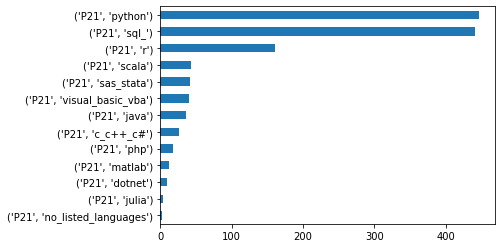

In [ ]:
#linguagens de programçao
pds.filter(regex = "P21").sum().sort_values(ascending = True).plot(kind ='barh')

In [ ]:
#salvando valor da consulta
valor = pds.filter(regex = "P21").sum().sort_values(ascending = False)

#capturando apenas os indexes que contem os nomes
valores = valor.index

#limpando os valores
valores_lp = limpaStr(valores)

#total para cada linguagem
total_lp = pds.filter(regex = "P21").sum().sort_values(ascending=False)

In [ ]:
grafico = go.Bar(x = valor,
                 y = valores_lp,
                 orientation='h',
                 text = valor,
                 textposition='auto')


data = [grafico]
layout = go.Layout(title='Linguagens de Programação mais utlizadas',
                   yaxis={'title': 'Linguagem de Programação','categoryorder':'total ascending'},
                   xaxis={'title': 'Quantidade'})
fig = go.Figure(data=data, layout=layout )
py.iplot(fig)

In [ ]:
#fontes de dados mais utilizadas
pds.filter(regex = "P24").sum().sort_values(ascending = False)

('P24', 'sql')          432
('P24', 'planilhas')    202
('P24', 'nosql')         80
('P24', 'nlp')           37
('P24', 'imagens')        8
('P24', 'other')          7
('P24', 'vídeos')         3
dtype: int64

In [ ]:
#salvando valor da consulta
valor = pds.filter(regex = "P24").sum().sort_values(ascending = False)

#capturando apenas os indexes que contem os nomes
valores = valor.index

#limpando os valores
valores_fd = limpaStr(valores)


#total para cada fonte
total_fd = pds.filter(regex = "P24").sum().sort_values(ascending=False)


In [ ]:
grafico = go.Bar( x = total_fd,
                 y = valores_fd,
                 orientation = 'h',
                 text = total_fd,
                 textposition='auto')


data = [grafico]

layout = go.Layout(title = "Fontes de dados mais utilizadas",
                   yaxis={'categoryorder':'total ascending'})

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [ ]:
#metodos
pds.filter(regex = "P20").sum().sort_values(ascending = False)

('P20', 'linear_regression')             288
('P20', 'decision_tree')                 230
('P20', 'logistic_regression')           226
('P20', 'cluster_analysis')              206
('P20', 'random_forest')                 197
('P20', 'no_listed_methods')             140
('P20', 'neural_networks')               134
('P20', 'nlp')                           133
('P20', 'bayesian_inference')            119
('P20', 'gradient_boosted_machines')     108
('P20', 'ensemble')                       93
('P20', 'svms')                           84
('P20', 'glms')                           73
('P20', 'cnns')                           48
('P20', 'longitudinal_data_analysis')     47
('P20', 'rnns')                           45
('P20', 'markov_chains')                  39
('P20', 'survival_analysis')              38
('P20', 'joint analysis')                 36
('P20', 'hmms')                           10
('P20', 'gans')                            9
dtype: int64

In [ ]:
#salvando valor da consulta
valor = pds.filter(regex = "P20").sum().sort_values(ascending = False)

#capturando apenas os indexes que contem os nomes
valores = valor.index

#limpando os valores
valores_met = limpaStr(valores)

#total para cada metodo
total_met = pds.filter(regex = "P20").sum().sort_values(ascending=False)

In [ ]:
grafico = go.Bar( x = total_met,
                 y = valores_met,
                 orientation = 'h',
                 text = total_met,
                 textposition='auto')


data = [grafico]

layout = go.Layout(title = "Metodos utilizados",
                   yaxis={'categoryorder':'total ascending'})

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [ ]:
#bancos de dados
pds.filter(regex = "P26").sum().sort_values(ascending = False)

('P26', 'sql_server')         204
('P26', 'mysql')              203
('P26', 'postgresql')         198
('P26', 's3')                 133
('P26', 'oracle')             120
('P26', 'mongodb')            106
('P26', 'elaticsearch')        67
('P26', 'other')               60
('P26', 'sqlite')              48
('P26', 'mariadb')             35
('P26', 'dynamodb')            29
('P26', 'db2')                 25
('P26', 'google_bigtable')     24
('P26', 'redis')               23
('P26', 'firebase')            21
('P26', 'hbase')               19
('P26', 'ms_access')           18
('P26', 'aurora')              18
('P26', 'cassandra')           14
('P26', 'sybase')              11
('P26', 'neo4j')               11
('P26', 'vertica')              5
('P26', 'datomic')              2
('P26', 'coachdb')              2
dtype: int64

In [ ]:
#salvando valor da consulta
valor = pds.filter(regex = "P26").sum().sort_values(ascending = False)

#capturando apenas os indexes que contem os nomes
valores = valor.index

#limpando os valores
valores_bd = limpaStr(valores)

#total para cada banco de dados
total_bd = pds.filter(regex = "P26").sum().sort_values(ascending=False)

In [ ]:
#testar grafico de pontos, porque esse nao da pra ver mto bem

In [ ]:
grafico = go.Bar( x = total_bd,
                 y = valores_bd,
                 orientation = 'h',
                 text = total_bd,
                 textposition='auto')


data = [grafico]

layout = go.Layout(title = "Banco de dados utilizados",
                   yaxis={'categoryorder':'total ascending'})

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [ ]:
#oçoes de cloud
pds.filter(regex = "P25").sum().sort_values(ascending = False)

('P25', 'aws')                   270
('P25', 'gcp')                   118
('P25', 'azure')                 104
('P25', 'on_premise_servers')     87
('P25', 'cloud_própria')          85
('P25', 'other')                  30
('P25', 'ibm')                    24
dtype: int64

In [ ]:
#salvando valor da consulta
valor = pds.filter(regex = "P25").sum().sort_values(ascending = False)

#capturando apenas os indexes que contem os nomes
valores = valor.index

#limpando os valores
valores_cloud = limpaStr(valores)

#total para cada oçcao de cloud
total_cloud = pds.filter(regex = "P25").sum().sort_values(ascending=False)

In [ ]:
grafico = go.Bar( x = total_cloud,
                 y = valores_cloud,
                 orientation = 'h',
                 text = total_cloud,
                 textposition='auto')


data = [grafico]

layout = go.Layout(title = "Opções de Cloud utilizadas",
                   yaxis={'categoryorder':'total ascending'})

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [ ]:
#ferramentas de bi
pds.filter(regex = "P27").sum().sort_values(ascending = False)

('P27', 'microsoft_powerbi')               231
('P27', 'tableau')                         124
('P27', 'metabase')                        100
('P27', 'no_bi_tool_at_work')               82
('P27', 'google_data_studio')               82
('P27', 'qlik_view_qlik_sense')             58
('P27', 'only_excel_gsheets')               56
('P27', 'other')                            48
('P27', 'redash')                           20
('P27', 'microstrategy')                    18
('P27', 'ibm_analytics_cognos')             16
('P27', 'sap_business_objects')             12
('P27', 'superset')                         12
('P27', 'looker')                           10
('P27', 'oracle_business_intelligence')      4
('P27', 'birst')                             1
dtype: int64

In [ ]:
#salvando valor da consulta
valor = pds.filter(regex = "P27").sum().sort_values(ascending = False)

#capturando apenas os indexes que contem os nomes
valores = valor.index

#limpando os valores
valores_bi = limpaStr(valores)

#total para cada ferramenta de bi
total_bi = pds.filter(regex = "P25").sum().sort_values(ascending=False)

In [ ]:
grafico = go.Bar( x = total_bi,
                 y = valores_bi,
                 orientation = 'h',
                 text = total_bi,
                 textposition='auto')


data = [grafico]

layout = go.Layout(title = "Ferramentas de BI utilizadas",
                   yaxis={'categoryorder':'total ascending'})

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [ ]:
#ferramentas de etl
pds.filter(regex = "P28").sum().sort_values(ascending = False)

('P28', 'sql_&_stored_procedures')                 174
('P28', 'other')                                   111
('P28', 'apache_airflow')                          106
('P28', 'pentaho')                                 104
('P28', 'siss_sql_server_integration_services')     79
('P28', 'aws_glue')                                 77
('P28', 'ibm_data_stage')                           25
('P28', 'alteryx')                                  25
('P28', 'talend')                                   22
('P28', 'oracle_data_integrator')                   17
('P28', 'sap_bw_etl')                               13
('P28', 'luigi')                                    10
dtype: int64

In [ ]:
#salvando valor da consulta
valor = pds.filter(regex = "P28").sum().sort_values(ascending = False)

#capturando apenas os indexes que contem os nomes
valores = valor.index

#limpando os valores
valores_etl = limpaStr(valores)

#total para cada ferramenta de bi
total_etl = pds.filter(regex = "P28").sum().sort_values(ascending=False)

In [ ]:
grafico = go.Bar( x = total_etl,
                 y = valores_etl,
                 orientation = 'h',
                 text = total_etl,
                 textposition='auto')


data = [grafico]

layout = go.Layout(title = "Ferramentas de ETL utilizadas",
                   yaxis={'categoryorder':'total ascending'})

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [ ]:
#td mundo ate 24 porque a maior lista de valores tem 24 linhas, que no caso é a lista de banco de dados
valores_met = insereDadoAte(valores_met, 24)
total_met = insereDadoAte(list(total_met), 24)
valores_lp = insereDadoAte(valores_lp, 24)
total_lp = insereDadoAte(list(total_lp), 24)
valores_fd = insereDadoAte(valores_fd, 24)
total_fd = insereDadoAte(list(total_fd), 24)
total_bd = list(total_bd)
valores_cloud = insereDadoAte(valores_cloud, 24)
total_cloud = insereDadoAte(list(total_cloud), 24)
valores_bi = insereDadoAte(valores_bi, 24)
total_bi = insereDadoAte(list(total_bi), 24)
valores_etl = insereDadoAte(valores_etl, 24)
total_etl = insereDadoAte(list(total_etl), 24)

#dicionario com os valores das consultas
dicionario = {
    'Metodos' : valores_met,
    'Metodos_Total' : total_met,
    'Linguam de Programacao' : valores_lp,
    'Linguam de Programacao_Total' : total_lp,
    'Fontes de Dados' : valores_fd,
    'Fontes de Dados_Total' : total_fd,
    'Banco de Dados' : valores_bd,
    'Banco de Dados_Total' : total_bd,
    'Opcoes de Cloud' : valores_cloud,
    'Opcoes de Cloud_Total' : total_cloud,
    'Ferramentas de BI' : valores_bi,
    'Ferramentas de BI_Total': total_bi,
    'Ferramentas de ETL' : valores_etl,
    'Ferramentas de ETL_Total': total_etl
}


In [ ]:
#criadno uma tabela resposta com todos os requisitos da pergunta
tabela_resposta = pd.DataFrame(data= dicionario, index = list(range(24)))

In [ ]:
tabela_resposta

,Metodos,Metodos_Total,Linguam de Programacao,Linguam de Programacao_Total,Fontes de Dados,Fontes de Dados_Total,Banco de Dados,Banco de Dados_Total,Opcoes de Cloud,Opcoes de Cloud_Total,Ferramentas de BI,Ferramentas de BI_Total,Ferramentas de ETL,Ferramentas de ETL_Total
0,linear_regression,288,python,447,sql,432,sql_server,204,aws,270,microsoft_powerbi,270,sql_&_stored_procedures,174
1,decision_tree,230,sql_,442,planilhas,202,mysql,203,gcp,118,tableau,118,other,111
2,logistic_regression,226,r,161,nosql,80,postgresql,198,azure,104,metabase,104,apache_airflow,106
3,cluster_analysis,206,scala,43,nlp,37,s3,133,on_premise_servers,87,no_bi_tool_at_work,87,pentaho,104
4,random_forest,197,sas_stata,42,imagens,8,oracle,120,cloud_própria,85,google_data_studio,85,siss_sql_server_integration_services,79
5,no_listed_methods,140,visual_basic_vba,41,other,7,mongodb,106,other,30,qlik_view_qlik_sense,30,aws_glue,77
6,neural_networks,134,java,36,vídeos,3,elaticsearch,67,ibm,24,only_excel_gsheets,24,ibm_data_stage,25
7,nlp,133,c_c++_c#,26,---,---,other,60,---,---,other,---,alteryx,25
8,bayesian_inference,119,php,18,---,---,sqlite,48,---,---,redash,---,talend,22
9,gradient_boosted_machines,108,matlab,12,---,---,mariadb,35,---,---,microstrategy,---,oracle_data_integrator,17


Tabela com todos dos dados da pergunta, ordenada do mais utilizada para menos utilizada.

### Pergunta 8: Quais as plataformas de estudo mais utilizadas e mais preferidas pelos entrevistados?

In [ ]:
#Para essa pergunta e a proxima foquei apenas nos profissionais que se consideram cientista de dados

In [211]:
pds.filter(regex = "P34").sum().sort_values(ascending = False)

('P34', 'udemy')             524
('P34', 'coursera')          312
('P34', 'udacity')           262
('P34', 'data_camp')         177
('P34', 'kaggle_learn')      145
('P34', 'height')            138
('P34', 'edx')               124
('P34', 'other')              97
('P34', 'online_courses')     56
('P34', 'data_quest')         29
dtype: int64

In [213]:
cds.filter(regex = "P34").sum().sort_values(ascending = False)

('P34', 'udemy')             128
('P34', 'coursera')          122
('P34', 'udacity')            94
('P34', 'data_camp')          76
('P34', 'edx')                58
('P34', 'kaggle_learn')       57
('P34', 'height')             25
('P34', 'online_courses')     11
('P34', 'other')               9
('P34', 'data_quest')          9
dtype: int64

In [215]:
total_plat = cds.filter(regex = "P34").sum().sort_values(ascending = False)

In [216]:
valores = cds.filter(regex = "P34").sum().sort_values(ascending = False).index

In [217]:
valores_plat = limpaStr(valores)

In [237]:
grafico = go.Bar( y = total_plat,
                 x = valores_plat,
                 text = total_plat,
                 textposition='outside')


data = [grafico]

layout = go.Layout(title = "Plataformas utilizadas (já iniciou/completou cursos)",
                   yaxis={'categoryorder':'total ascending'})

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [228]:
cds.shape

(193, 175)

In [238]:
pds["('P35', 'data_science_plataforms_preference')"].value_counts().index

Index(['Udemy', 'Coursera', 'Udacity', 'DataCamp', 'Nunca fiz cursos online',
       'Alura', 'Kaggle Learn', 'edX', 'DataQuest'],
      dtype='object')

In [233]:
cds["('P35', 'data_science_plataforms_preference')"].isna().sum()

6

In [236]:
cds["('P35', 'data_science_plataforms_preference')"].value_counts().sum()

187

In [239]:
grafico = go.Bar( y = list(cds["('P35', 'data_science_plataforms_preference')"].value_counts()),
                 x = cds["('P35', 'data_science_plataforms_preference')"].value_counts().index,
                 text = list(cds["('P35', 'data_science_plataforms_preference')"].value_counts()),
                 textposition='outside')


data = [grafico]

layout = go.Layout(title = "Plataformas preferidas",
                   yaxis={'categoryorder':'total ascending'})

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

Das plataformas que os profissionais que atuam como cientista de dados as plataformas preferidas e mais utilizadas são: Coursera, Udemy, DataCamp e Udacity.

### Pergunta 9: Como esses profissionais se atualizam? Quais as as formas/meios utilizados para se atualizar o seu conhecimento ?

In [241]:
cds.head()

,"('P0', 'id')","('P1', 'age')","('P2', 'gender')","('P3', 'living_in_brasil')","('P5', 'living_state')","('P6', 'born_or_graduated')","('P8', 'degreee_level')","('P10', 'job_situation')","('P12', 'workers_number')","('P13', 'manager')","('P16', 'salary_range')","('P17', 'time_experience_data_science')","('P18', 'time_experience_before')","('P19', 'is_data_science_professional')","('P20', 'linear_regression')","('P20', 'logistic_regression')","('P20', 'glms')","('P20', 'decision_tree')","('P20', 'random_forest')","('P20', 'neural_networks')","('P20', 'bayesian_inference')","('P20', 'ensemble')","('P20', 'svms')","('P20', 'cnns')","('P20', 'rnns')","('P20', 'hmms')","('P20', 'gans')","('P20', 'markov_chains')","('P20', 'nlp')","('P20', 'gradient_boosted_machines')","('P20', 'cluster_analysis')","('P20', 'survival_analysis')","('P20', 'longitudinal_data_analysis')","('P20', 'joint analysis')","('P20', 'no_listed_methods')","('P21', 'sql_')","('P21', 'r')","('P21', 'python')","('P21', 'c_c++_c#')","('P21', 'dotnet')",...,"('P31', 'weekly_newsletter')","('P31', 'slack_channel')","('P31', 'data_hackers_bootcamp')","('P31', 'do_not_know_data_hackers')","('P32', 'prefered_data_hackers_initiative')","('P33', 'telegram_groups')","('P33', 'whatsapp_groups')","('P33', 'youtube_channels')","('P33', 'other_brasilian_blogs')","('P33', 'other_slack_channels')","('P33', 'twitter')","('P33', 'abroad_blogs')","('P33', 'abroad_podcasts')","('P33', 'meetups_and_events')","('P33', 'only_data_hackers')","('P33', 'other')","('P34', 'udacity')","('P34', 'coursera')","('P34', 'udemy')","('P34', 'height')","('P34', 'edx')","('P34', 'data_camp')","('P34', 'data_quest')","('P34', 'kaggle_learn')","('P34', 'online_courses')","('P34', 'other')","('P35', 'data_science_plataforms_preference')","('P35', 'other')","('P36', 'draw_participation')","('D1', 'living_macroregion')","('D2', 'origin_macroregion')","('D3', 'anonymized_degree_area')","('D4', 'anonymized_market_sector')","('D5', 'anonymized_manager_level')","('D6', 'anonymized_role')",idadeT2,salario2,tempo_experiencia_anterior,tempo_experiencia_ds,profissao
9,4t388yqrekd1gsq4t388b9gqkmt2z86x,28.0,Masculino,1,São Paulo (SP),1.0,Mestrado,Empregado (CTL),Acima de 3000,0.0,de R$ 8.001/mês a R$ 12.000/mês,de 2 a 3 anos,de 6 a 10 anos,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Área da Saúde,NaN,Data Scientist/Cientista de Dados,"[25,30]",de R$ 8.001/mês a R$ 12.000/mês,de 6 a 10 anos,de 2 a 3 anos,Cientista de Dados
14,bhacmlt12qr71dgbhacmltqzti96uw3e,26.0,Feminino,1,São Paulo (SP),0.0,Graduação/Bacharelado,Empregado (CTL),de 11 a 50,0.0,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Menos de 1 ano,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,Blog/Medium do Data Hackers,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Udemy,NaN,1.0,Região Sudeste,Região Nordeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Data Scientist/Cientista de Dados,"[25,30]",de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Menos de 1 ano,Cientista de Dados
20,hgfcakywa7c5hgfcv0vyvmdno3a4irtw,23.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,...,1,1,0,0,Podcast do Data Hackers,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,Região Nordeste,Outras Engenharias,Varejo,NaN,Data Scientist/Cientista de Dados,"[19,24]",de R$ 2.001/mês a R$ 3000/mês,Não tive experiencia na area de TI anteriormente,Não tenho experiência na área de dados,Cientista de Dados
36,15kmtpwmxk32d0d0adorubc15kmtpwvj,25.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 

In [243]:
cds["('P35', 'other')"].value_counts()

DSA                                  1
datascienceacademy                   1
Pluralsight                          1
Nenhuma. Prefiro estudar sozinho.    1
Datascienceacademy                   1
Não gostei da qual utilizei          1
Name: ('P35', 'other'), dtype: int64

In [248]:
cds.filter(regex = "P33").sum().sort_values(ascending = False)

('P33', 'abroad_blogs')             129
('P33', 'meetups_and_events')       116
('P33', 'youtube_channels')         101
('P33', 'abroad_podcasts')           67
('P33', 'other_brasilian_blogs')     67
('P33', 'telegram_groups')           55
('P33', 'twitter')                   49
('P33', 'whatsapp_groups')           48
('P33', 'other')                     22
('P33', 'other_slack_channels')      21
('P33', 'only_data_hackers')          4
dtype: int64

In [250]:
grafico = go.Bar( y = list(cds.filter(regex = "P33").sum().sort_values(ascending = False)),
                 x = cds.filter(regex = "P33").sum().sort_values(ascending = False).index,
                 text = list(cds.filter(regex = "P33").sum().sort_values(ascending = False)),
                 textposition='outside')


data = [grafico]

layout = go.Layout(title = "Plataformas preferidas",
                   yaxis={'categoryorder':'total ascending'})

fig = go.Figure(data=data, layout=layout)

py.iplot(fig)

In [ ]:
#melhorar esse grafico

In [ ]:
#pergunta pro futuro, datawarehouse
#pergunta pro futuro, 